
# Alzheimer Detection and Classifier

> Alzheimer is known the most for the causes of dementia. It takes 2/3 of the whole dementia popilation, while the cause is still unknown. According to papers from Lancet neurology, even the old theory such as neural inflations, which was disregarded as the cause compared to tau-protein, beta-amiloids, and genetic factors (Apo E4). 

Before I start, I'll have to explain a bit more about the Alzheimer, because, the data contains 4 classes of Alzheimer that depends on the severity of dementia. 

There are degrees of severity in Alzheimer. 
1. Very mildly demented : This is the stage where patient starts to forget where they put their stuff, other people's names recently, etc. It is hard to detect through cognitive ability test. 

2. Mildly demented : This is the stage where patients don't remember the words, can't find their way to the destination, loss of focus and work-abilities. This is also the stage where patients even forget that they are losing memory. From this stage, with cognitive testing, it can be found. 

3. Moderately demented : Starts to forget the recent activities, important old histories, have hard time calculating the budget, hard to go outside alone, and loss of empathy. 

There are 3 more stages in the moderately dementia, which in the terminal stage, the patient can't move on their own, while they lose the ability to speak. But I assume that the current dataset from Kaggle [https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset] is considering all the these stages merged inside 'Moderately demeted' or not even considered. 

Knowing these stages are important because the faster the stage the patient is at, the treatment will have higher effect in terms of slowing the process. If the dementia is found during the moderately demented stage, it is known that the patient will pass away in 3 years. (One of the reported case is a rythm guitarists Malcom from the band AC/DC was diagnosed severe dementia at 2014.)

Thus, having an AI that detects alzheimer dementia in the early stage can allow longer life expactancy from the patient as well as higher life quality overall from the slowdown of dementia. 

As Alzheimer can not only be found with cognitive ability testing, but also through MRI or CT by looking at the ventricles of the brain and cortical atrophy, the theoratical foundation on this project is solid. Doctors find the patient with Alzheimer's have a brain that have enlarged ventricles (that lies in the center of the brain) as well as thinner cortical grey area of the brain.  

This project will go through various ML models from basic, and see which type works the best. I will try to implement diverse models for Alzheimer detection(non vs with alzheimer) as well as Alzheimer Classifier(non vs very mild vs mild vs moderate)

In [1]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()

First, download the data from Kaggle [https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset]

In [2]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'C:\Users\green\Desktop\Dataset\Very_Mild_Demented\*')
mild = glob(r'C:\Users\green\Desktop\Dataset\Mild_Demented\*')
moderate = glob(r'C:\Users\green\Desktop\Dataset\Moderate_Demented\*')

#Dataset without Alzheimer
non = glob(r'C:\Users\green\Desktop\Dataset\Non_Demented\*')

C:\Users\green\Desktop\Dataset\Non_Demented\non_10.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

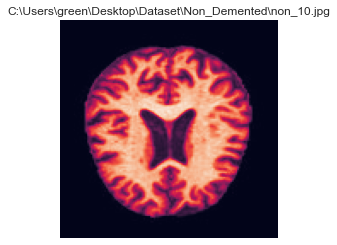

In [6]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

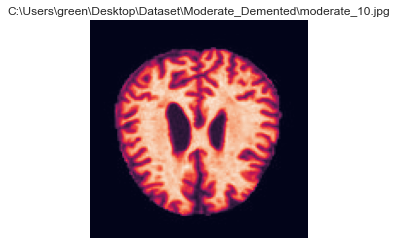

In [7]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

Prepare the data in 2 different ways. 
1. Alzheimer Detection: Whether the patient has the alzhiemer or not (non vs all other categories) 
2. Alzheimer Classifier: Define what stage the patient is in the alzheimer. 

The models that are going to be tested here are 
1. PCA for Alzheimer Detection
2. LDA for Alzheimer Detection and Alzheimer Classifier
3. SVM for Alzheimer Detection and Alzheimer Classifier
4. CNN (VGG16) for Alzheimer Detection and Alzheimer Classifier

## Alzheimer Detection Models
### PCA for Alzheimer Detection

Number of components explaining 80% variance: 174
[[ 15.6107265   13.60672971   1.62328387 ...  -0.70249498  -0.68678468
    1.84766606]
 [-19.94982944  -0.72068077   9.24304988 ...  -0.61956258   0.81608269
   -0.9417818 ]
 [-17.85178413  -1.1288659   15.24209505 ...  -0.14503195   0.47769938
    0.42981624]
 ...
 [-16.35439471  -8.12188168   7.15743362 ...  -0.32640261  -1.01993289
   -0.45662458]
 [  1.30798214   8.05542344 -11.18019212 ...  -0.64167315   0.20225147
    0.69509585]
 [-17.49366138  -3.11130508  -5.27117481 ...   0.73781906   0.62704203
   -0.18308238]]


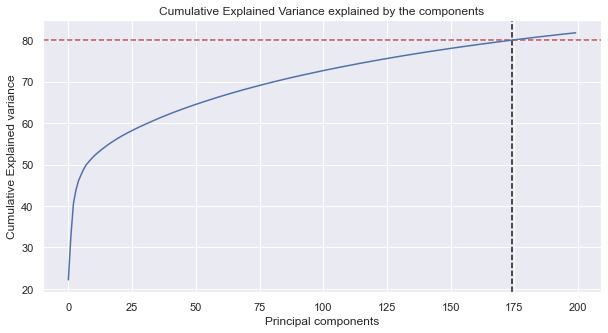

In [6]:
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

#for PCA
all_data = np.concatenate((np.array(non_ALZ),np.array(ALZ)))
#print(all_data)
all_data = all_data.reshape(all_data.shape[0], np.product(all_data.shape[1:]))

scaler = StandardScaler()
scaler.fit(all_data)

#standardize data to 0 mean and unit variance
X = scaler.transform(all_data)

#split the data 
from sklearn.model_selection import train_test_split
y = [0] * len(non_ALZ) + [1] * len(ALZ)
X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.2)

scala = preprocessing.StandardScaler()
#Compressing the images into two dimensions using PCA
pca = decomposition.PCA(200)
X_proj = pca.fit_transform(X_train)

#let's first see which principal component works better
#scree plot but cumulative
# Getting the cumulative variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100 #100 is multiplied for percentage
 
# How many PCs explain 90% of the variance?
k = np.argmax(var_cumu>80)
print("Number of components explaining 80% variance: "+ str(k)) #I guess, I will have to use 160 axis
#print("\n")
 
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=80, color="r", linestyle="--")
ax = plt.plot(var_cumu)

print(X_proj)

From looking at the above, PCA will differentiate the dataset into two, a brain suffering from alzheimer or not. However, to have at least 80% accuracy of differentiation, it requires 174 principal components. This means that to differentiate the data with 80% accuracy, we will need to make a model that has 174 different axis in the data.

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_LDA = lda.fit_transform(X_train, y_train)
X_test_LDA = lda.transform(X_test)
accuracy = lda.score(X_test, y_test)
print(accuracy*100, '% accuracy (testing data)' )
accuracy_train = lda.score(X_train, y_train)
print(accuracy_train*100, '% accuracy (training data)')

90.078125 % accuracy (testing data)
99.9609375 % accuracy (training data)


First time when I saw the performance of the LDA(Linear Discriminant Analysis) model, I was suprised to see the performance of the model on the training data is so high. as well as the performance on the testing data is also significant. This gave me a lot of confidence about the data as it seems to be very well taken with MRI. 

### SVM for Alzheimer Detection

In [17]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)



In [18]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct SVM
print(len(resized_image_array))
print(resized_image_array[1])

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)


3200
3200
6400
[0 0 0 ... 0 0 0]


In [19]:
#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean that it is having some overfitting

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix : [[2553    0]
 [   0 2567]]
Accuracy :  0.9796875
Precision :  0.9825119236883942
Recall :  0.976303317535545
f1 :  0.9793977812995245
Confusion matrix : [[636  11]
 [ 15 618]]


In [22]:
#Train a SVM using polynomial kernel with degree of 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.8931640625
Precision :  0.8814199395770392
Recall :  0.9092325671990651
f1 :  0.8951102588686481
Confusion matrix : [[2239  314]
 [ 233 2334]]
Accuracy :  0.86171875
Precision :  0.8433734939759037
Recall :  0.8846761453396524
f1 :  0.8635312259059369
Confusion matrix : [[543 104]
 [ 73 560]]


In [23]:
#Train a SVM using RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.8650390625
Precision :  0.8451066961000736
Recall :  0.8948188546941955
f1 :  0.8692526017029327
Confusion matrix : [[2132  421]
 [ 270 2297]]
Accuracy :  0.83203125
Precision :  0.7994269340974212
Recall :  0.8815165876777251
f1 :  0.8384673178061607
Confusion matrix : [[507 140]
 [ 75 558]]


Already from the SVM's linear kernel, the performance of the model is very promising. Considering that this model is not those of so-what-called 'State-of-the-Art', it still has a stellar performance. 

Suprisingly, as the kernel gets more complex, the overall performance does not necessarily rises. This may be the reason that 'having Alzheimer' or not is very easy to distinguish by looking at the thickness of the grey mater and the size of the ventricles. Which does not require some complex kernel tricks to be made. 

However, at this point, it is just 'Alzheimer detector' not 'Alzheimer classifier' as the original data is categorical variable. So, when I start conducting the Alzheimer classifier, more complex kernel may be better rather than a simple linear kernel trick.

### VGG16 (CNN) for Alzheimer Detection
VGG16 is known to take RGB colored data as the input for the model. However, the MRI images are in greyscale. So, I had to research on how to make the grayscale data to multi-channel before I feed it to VGG16. 
Reference for this greyscale data : 
1. https://forums.fast.ai/t/black-and-white-images-on-vgg16/2479 
2. https://forums.fast.ai/t/using-vgg-with-greyscale-images/854
3. https://github.com/keras-team/keras/issues/11208

In [10]:
#pip install opencv-python

In [11]:
#Code snippet for pre-processing mnist data:https://github.com/keras-team/keras/issues/11208
#The above code is revised for this project's purpose. 
import cv2
dim = (128, 128) #original shape of the image

def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

#for PCA
all_data = np.concatenate((np.array(non_ALZ),np.array(ALZ)))
#print(all_data)
all_data = all_data.reshape(all_data.shape[0], np.product(all_data.shape[1:]))

scaler = StandardScaler()
scaler.fit(all_data)

#standardize data to 0 mean and unit variance
X = scaler.transform(all_data)

#split the data 
from sklearn.model_selection import train_test_split
y = [0] * len(non_ALZ) + [1] * len(ALZ)
X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.2)

#convert grayscale to 128x128 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

rgb_list = []
#convert X_train data to 128x128 rgb values
for i in range(len(X_train)):
    rgb = to_rgb(X_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape)
    
rgb_arr = np.stack([rgb_list],axis=4)
rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
print(rgb_arr_to_3d.shape)

(5120, 128, 128, 3)


In [12]:
rgb_list_test = []
#convert X_test data to 128x128 rgb values
for i in range(len(X_test)):
    rgb = to_rgb(X_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape)
    
rgb_arr_test = np.stack([rgb_list],axis=4)
rgb_arr_to_3d_test = np.squeeze(rgb_arr, axis=4)
print(rgb_arr_to_3d_test.shape)

(5120, 128, 128, 3)


In [ ]:
#set up the environment
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Input, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

vgg16 = VGG16(weights = 'imagenet', input_shape = (128, 128, 3), include_top = False)
vgg16.summary()

vgg16.trainable = False
final_model = Sequential()
final_model.add(vgg16)
final_model.add(Flatten(name='flatten'))
final_model.add(Dense(2,activation = 'softmax', name = 'predictions'))
final_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

final_model.fit(rgb_arr_to_3d, np.array(y_train).reshape(-1,1), batch_size = 7, epochs = 10, verbose = 1)
final_model.fit(rgb_arr_to_3d_test, np.array(y_test).reshape(-1,1), batch_size = 7, epochs = 10, verbose = 1)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

From the results, SVM with linear kernel has 98% for all performance measure on testing data. Other kernels that are more complex than this did not work well with SVM as the linear kernel. LDA on the other hand had 90% accuracy on testing data. PCA can have 80% accuracy by having 174 principle components(may change as it depends how training and testing data are split). CNN model(VGG16) suprisingly had low performance considering that it is the most complicated model that I've used for the Alzheimer Detector. This may be because that I've changed the greyscale to RBG(colored images) so that it fits the requirement for VGG16. (VGG16 is used for color images). Thus, making the data change might have affected the performance of VGG16. Accuracy of somewhere around 50% just means that it is not different compared to making a random guess as there are only two choices for the AI model to decide. 'This image is a Alzheimer patient's brain' or not. 

To see if this is the issue for CNN itself or from transforming the data, I will try different model in the Alzheimer Classifier. (EfficientNetB0)

## Alzheimer Classifier
Now is the time where we make SVM, LDA, and CNN models for Alzheimer classifier. 
### SVM for Alzheimer Classifier

In [ ]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        elif image_directory == very_mild:
            resized_image_array_label.append(1)
        elif image_directory == mild:
            resized_image_array_label.append(2)
        else:
            resized_image_array_label.append(3)

resizer(non)
resizer(very_mild)
resizer(mild)
resizer(moderate)

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean that it is having some overfitting

In [ ]:
#Train a SVM using polynomial kernel with degree of 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

In [ ]:
#Train a SVM using RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

The above performance tells...


### VGG16 (CNN) model for Alzheimer Classifier

In [ ]:
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]

all_data = np.concatenate((np.array(non_ALZ),np.array(vmild_ALZ), np.array(mild_ALZ), np.array(moderate_ALZ)))
#print(all_data)
all_data = all_data.reshape(all_data.shape[0], np.product(all_data.shape[1:]))

scaler = StandardScaler()
scaler.fit(all_data)

#standardize data to 0 mean and unit variance
X = scaler.transform(all_data)

#split the data 
from sklearn.model_selection import train_test_split
y = [0] * len(non_ALZ) + [1] * len(vmild_ALZ) + [2]*len(mild_ALZ) + [3]*len(moderate_ALZ)
X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.2)


From the above, the performance of VGG16(CNN) tells...

### LDA for Alzheimer Classifier

Overall, from the performance, this data really seems to fit well on...

### Extra (EfficientNet-B0)
Rather than using the typical and basic models, here, I use a bit more state-of-the-art model EfficientNet. Depending on the input data's shape, EfficientNet changes a little bit. However, for the smallest shape (224x224) EfficientNetB0 is used. 

- Reference 
1. https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
2. https://towardsdatascience.com/neural-architecture-transfer-54226b2306e3 
3. https://towardsdatascience.com/state-of-the-art-image-classification-algorithm-fixefficientnet-l2-98b93deeb04c 